In [3]:
import numpy as np
import pandas as pd
pd.set_option('html', True)


In [5]:
url = "C:\Users\Anshul\Desktop\TestNetworkData.csv"
TestNetworkData = pd.read_csv(url)
TestNetworkData.head()

,No.,Time,Source,Destination,Protocol,Info
0,1,0.000000,Cisco_cd:c4:87,PVST+,STP,RST. Root = 32838/00:0f:90:cd:c4:80 Cost = 0 ...
1,2,2.004101,Cisco_cd:c4:87,PVST+,STP,RST. Root = 32838/00:0f:90:cd:c4:80 Cost = 0 ...
2,3,1594.520130,Cisco_cd:c4:82,PVST+,STP,RST. Root = 32788/00:0f:90:cd:c4:80 Cost = 0 ...
3,4,1594.592844,Cisco_cd:c4:86,PVST+,STP,RST. Root = 32828/00:0f:90:cd:c4:80 Cost = 0 ...
4,5,1595.029504,Cisco_cd:c4:81,PVST+,STP,RST. Root = 32778/00:0f:90:cd:c4:80 Cost = 0 ...


In [6]:
B4GroupByForDest = TestNetworkData[['No.', 'Time', 'Source', 'Destination','Protocol']] 
B4GroupByForDest.head()


,No.,Time,Source,Destination,Protocol
0,1,0.000000,Cisco_cd:c4:87,PVST+,STP
1,2,2.004101,Cisco_cd:c4:87,PVST+,STP
2,3,1594.520130,Cisco_cd:c4:82,PVST+,STP
3,4,1594.592844,Cisco_cd:c4:86,PVST+,STP
4,5,1595.029504,Cisco_cd:c4:81,PVST+,STP


In [7]:
GroupByTime = B4GroupByForDest.groupby('Time')
TimeGroupSizeXY = GroupByTime.size().order()
TimeGroupSizeXY

Time
0.00000         1
37028.87675     1
37028.87674     1
37028.26675     1
37028.26259     1
37027.66119     1
37027.65969     1
37027.65961     1
37027.65768     1
37027.65167     1
37027.64970     1
37027.64477     1
37027.64329     1
37027.64219     1
               ..
25590.75032    11
15593.23032    11
37193.07551    11
25590.78808    11
14792.02600    11
25590.87615    11
25590.79689    11
25590.81397    11
53450.62790    11
25590.83715    11
25590.83359    11
36389.87702    11
36390.09986    11
25590.91705    11
dtype: int64

In [11]:
GroupByDest = B4GroupByForDest.groupby('Destination')
DestGroupSizeXY = GroupByDest.size().order()
DestGroupSizeXY
# DestGroupSizeXY=DestGroupSizeXY[DestGroupSizeXY < DestGroupSizeXY.median()]
# DestGroupSizeXYLessThanMedian=DestGroupSizeXY[DestGroupSizeXY < DestGroupSizeXY.median()]
# print DestGroupSizeXYLessThanMedian.sum()
# print 4103/DestGroupSizeXY.sum()
# print DestGroupSizeXY.sum()
# print DestGroupSizeXY.median()

Destination
128.63.2.53             1
192.5.5.241             2
192.36.148.17           3
Vmware_82:39:63         4
Cisco_44:07:51          4
Cisco_b1:a3:61         13
128.8.10.90            35
192.203.230.10         35
128.9.0.107            36
10.51.16.167           42
Dell_61:b9:0f          47
Vmware_a5:d3:ed        81
Vmware_a0:8e:d7       121
Vmware_1e:8c:ad       141
Vmware_96:85:9a       165
                    ...  
10.51.16.9           2308
10.51.16.34          2373
10.51.16.33          3581
10.51.16.12          3593
10.51.16.11          4403
10.51.16.1           5633
Broadcast            6630
10.50.5.100          7460
10.51.16.57         13529
10.51.16.59         38567
10.51.16.35         49255
10.51.16.43         62204
PVST+              120480
10.51.16.51        170369
dtype: int64

In [12]:
%matplotlib inline
from itertools import cycle, islice

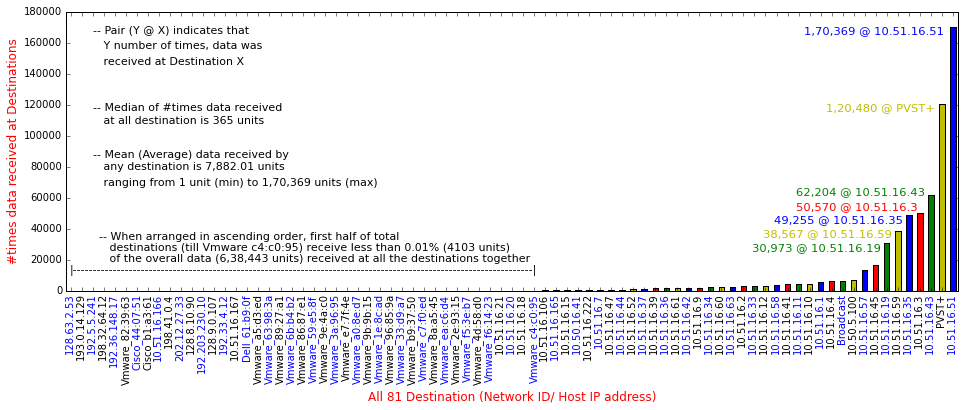

In [15]:
my_colors = list(islice(cycle(['b', 'r', 'g', 'y']), None, len(DestGroupSizeXY)))
myDestGroupPlotSortedBySize = DestGroupSizeXY.plot(kind='bar',stacked=True, color=my_colors, figsize=(16,5))

myDestGroupPlotSortedBySize.set_xlabel('All 81 Destination (Network ID/ Host IP address)',fontsize=12, color='r')
myDestGroupPlotSortedBySize.set_ylabel('#times data received at Destinations', fontsize=12, color='r')
myDestGroupPlotSortedBySize.text(2, 166000, '-- Pair (Y @ X) indicates that', fontsize=11)
myDestGroupPlotSortedBySize.text(2, 156000, '   Y number of times, data was', fontsize=11)
myDestGroupPlotSortedBySize.text(2, 146000, '   received at Destination X', fontsize=11)

myDestGroupPlotSortedBySize.text(2, 116000, '-- Median of #times data received ', fontsize=11)
myDestGroupPlotSortedBySize.text(2, 108000, '   at all destination is 365 units', fontsize=11)

myDestGroupPlotSortedBySize.text(2, 86000, '-- Mean (Average) data received by', fontsize=11)
myDestGroupPlotSortedBySize.text(2, 78000, '   any destination is 7,882.01 units', fontsize=11)
myDestGroupPlotSortedBySize.text(2, 68000, '   ranging from 1 unit (min) to 1,70,369 units (max)', fontsize=11)

myDestGroupPlotSortedBySize.text(0, 33000, '        -- When arranged in ascending order, first half of total                    ', fontsize=11)
myDestGroupPlotSortedBySize.text(0, 26000, '           destinations (till Vmware c4:c0:95) receive less than 0.01% (4103 units)               ', fontsize=11)
myDestGroupPlotSortedBySize.text(0, 19000, '           of the overall data (6,38,443 units) received at all the destinations together                    ', fontsize=11)
myDestGroupPlotSortedBySize.text(0, 12000, '|-------------------------------------------------------------------------------------------------------------------|', fontsize=11)

myDestGroupPlotSortedBySize.text(66.5, 166000, '1,70,369 @ 10.51.16.51', fontsize=11.45, color='b')
myDestGroupPlotSortedBySize.text(68.5, 116000, '1,20,480 @ PVST+', fontsize=11.45, color='y')
myDestGroupPlotSortedBySize.text(65.8, 62000, '62,204 @ 10.51.16.43', fontsize=11.45, color='g')
myDestGroupPlotSortedBySize.text(65.8, 52500, '50,570 @ 10.51.16.3', fontsize=11.45, color='r')
myDestGroupPlotSortedBySize.text(63.8, 44000, '49,255 @ 10.51.16.35', fontsize=11.45, color='b')
myDestGroupPlotSortedBySize.text(62.8, 35000, '38,567 @ 10.51.16.59', fontsize=11.45, color='y')
myDestGroupPlotSortedBySize.text(61.8, 26000, '30,973 @ 10.51.16.19', fontsize=11.45, color='g')


for label in myDestGroupPlotSortedBySize.get_xticklabels()[::2]:
    label.set_color('b')
    
# fig = myDestGroupPlotSortedBySize.get_figure()
# fig.savefig("C:\Users\Anshul\Desktop\DataSet1\output Destination.png")

In [14]:
DestGroupSizeXY.mean()

7882.0123456790125

In [325]:
# Now let's start with SOURCE and perform an union of the values in Source and destination
GroupBySource = B4GroupByForDest.groupby('Source')
SourceGroupSizeXY = GroupBySource.size().order()
SourceGroupSizeXY
# SourceGroupSizeXY=SourceGroupSizeXY[SourceGroupSizeXY < SourceGroupSizeXY.median()]
SourceGroupSizeXYLessThanMedian=SourceGroupSizeXY[SourceGroupSizeXY < SourceGroupSizeXY.median()]
print SourceGroupSizeXYLessThanMedian.sum()
print SourceGroupSizeXY.sum()
print SourceGroupSizeXY.median()
print SourceGroupSizeXY.count()

10737
638443
681.0
80


In [411]:
# Noe let's perform a join
dfSource = SourceGroupSizeXY.to_frame(name='MySource')
dfDest = DestGroupSizeXY.to_frame(name='MyDest')
dfinner =(dfSource.join(dfDest, how='inner'))
dfinner

,MySource,MyDest
Vmware_82:39:63,4,4
Cisco_44:07:51,711,4
Cisco_b1:a3:61,692,13
10.51.16.166,11,15
10.51.16.167,40,42
Dell_61:b9:0f,264,47
Vmware_a5:d3:ed,156,81
Vmware_63:98:3a,89,87
Vmware_89:27:a1,227,101
...,...,...


In [406]:
dfSourceDestGroup = dfSourceDest.groupby(['MyDest'])
df = dfSourceDestGroup.head()
df[np.isnan(df)] = 0
df

,MySource,MyDest
10.50.16.41,0,575
10.51.16.1,5064,5633
10.51.16.12,4619,3593
10.51.16.136,169,0
10.51.16.15,0,557
10.51.16.158,4,0
10.51.16.19,15875,30973
10.51.16.2,4069,3458
10.51.16.3,96972,50570
10.51.16.33,2822,3581


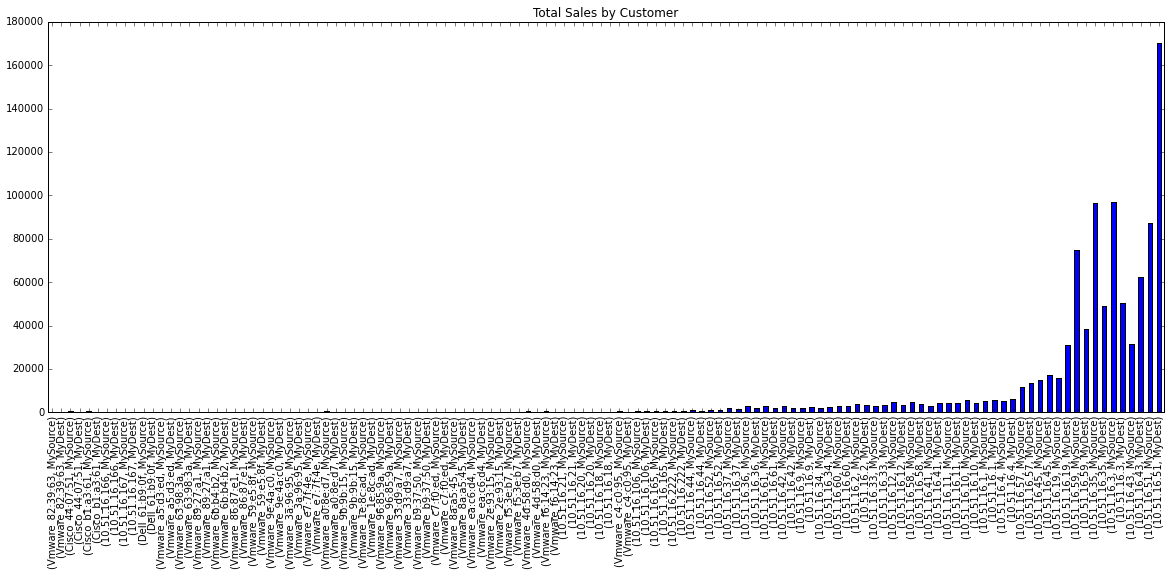

In [415]:
import matplotlib.pyplot as plt
# dfToArray = df.to_records('Source')
# dfToArray

dfinner.stack().plot(kind='bar',stacked=True,title="Total Sales by Customer", figsize=(20, 7))

# dfSourceList = df['MySource'].tolist()
# dfSourceList

# dfDestList = df['MyDest'].tolist()
# dfDestList

# X = range(100)

# plt.bar(X, dfSourceList, color = 'b')
# plt.bar(X, dfDestList, color = 'r', bottom = dfSourceList)
# plt.show()